### 기계학습을 이용한 Gene 발현 수준 분류
* Transcription profiling by high throughput sequencing of Arabidopsis roots, leaves, flowers and siliques 데이터 이용
* Source: https://www.ebi.ac.uk/gxa/experiments/E-GEOD-38612/Downloads TPM file

---

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb

In [2]:
df_ft = pd.read_csv('.Data/Arabidopsis_3/E-GEOD-38612-query-results.tpms.tsv',sep='\t',comment='#')
# comment: 해당 문자가 위치한 줄은 주석처리

df_ft.head()

,Gene ID,Gene Name,leaf,flower,fruit,root
0,AT1G01010,NAC001,4.0,10.0,3.0,38.0
1,AT1G01020,ARV1,16.0,16.0,7.0,18.0
2,AT1G01030,NGA3,5.0,7.0,1.0,2.0
3,AT1G01040,DCL1,16.0,21.0,16.0,19.0
4,AT1G01046,MIR838A,6.0,7.0,5.0,8.0


In [3]:
c = df_ft.columns[[1,2,3,4,5]] # Gene ID를 제외한 값만 남겨놓는다
df_ft_cut = df_ft[c]

df_ft_cut_ix = df_ft_cut.set_index('Gene Name') # Gene Name 열을 인덱스로 설정한다
df_ft_cut_ix.head()

,leaf,flower,fruit,root
Gene Name,,,,
NAC001,4.0,10.0,3.0,38.0
ARV1,16.0,16.0,7.0,18.0
NGA3,5.0,7.0,1.0,2.0
DCL1,16.0,21.0,16.0,19.0
MIR838A,6.0,7.0,5.0,8.0


In [4]:
# 계산 편의를 위해 missing value(NaN)를 0으로 치환한다. (NaN 값은 주로 발현되지 않은 값이기 때문)
df_ft_cut_ix_fn = df_ft_cut_ix.fillna(0)
X = df_ft_cut_ix_fn.values.T # 세로가 sample이고, 가로가 feature가 되도록 표 회전

y = [1,2,3,4] # 각 기관(leaf, flower, fruit, root)을 y로 지정

In [5]:
rf = RandomForestClassifier(n_estimators=2000,random_state=0)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
m = rf.feature_importances_ > 0 # 중요한 feature 선별. 중요도 0 이상을 고른다
selected_features = df_ft_cut_ix_fn.index[m] # masking을 이용해 주요 features 골라냄
df_ft_cut_ix_fn_selected = df_ft_cut_ix_fn.loc[selected_features]

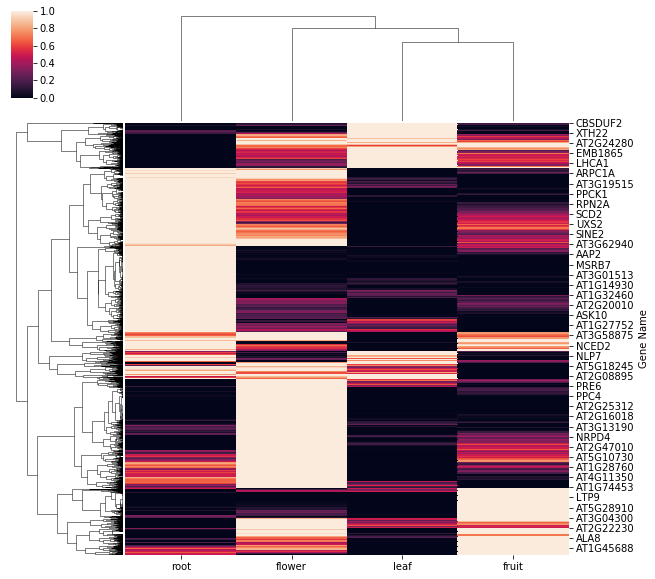

In [7]:
sb.clustermap(df_ft_cut_ix_fn_selected,standard_scale=0) # 부위별 유전자 발현 수준을 clustermap으로 표현

---
### 규모가 큰 Sample을 이용한 발현 수준 분류
* Source: https://www.ebi.ac.uk/gxa/experiments/E-GEOD-53197/Downloads TPM file

---

In [8]:
df_17 = pd.read_csv('.Data/Arabidopsis_17/E-GEOD-53197-query-results.tpms.tsv',sep='\t',comment='#')
df_17.head()

,Gene ID,Gene Name,"Bur-0, aerial part","Bur-0, floral bud","Bur-0, root","Ct-1, aerial part","Ct-1, floral bud","Ct-1, root","Edi-0, aerial part","Edi-0, floral bud",...,"Wil-2, root","Ws-0, aerial part","Ws-0, floral bud","Ws-0, root","Wu-0, aerial part","Wu-0, floral bud","Wu-0, root","Zu-0, aerial part","Zu-0, floral bud","Zu-0, root"
0,AT1G01010,NAC001,5.0,13.0,43.0,4.0,4.0,40.0,4.0,12.0,...,50.0,3.0,14.0,40.0,4.0,10.0,38.0,3.0,7.0,51.0
1,AT1G01020,ARV1,7.0,9.0,10.0,4.0,7.0,5.0,5.0,7.0,...,6.0,8.0,7.0,9.0,5.0,5.0,8.0,6.0,6.0,8.0
2,AT1G01030,NGA3,4.0,6.0,1.0,4.0,5.0,0.2,5.0,5.0,...,0.5,3.0,5.0,1.0,6.0,5.0,0.9,6.0,6.0,1.0
3,AT1G01040,DCL1,11.0,24.0,15.0,17.0,26.0,17.0,14.0,30.0,...,12.0,8.0,15.0,11.0,11.0,15.0,10.0,10.0,22.0,14.0
4,AT1G01046,MIR838A,2.0,8.0,2.0,0.7,7.0,3.0,4.0,6.0,...,0.6,3.0,5.0,2.0,1.0,3.0,0.7,2.0,16.0,3.0


In [9]:
c = df_17.columns[1:]
df_17_cut = df_17[c].set_index('Gene Name').fillna(0) # Gene ID 제거 및 Index 설정, NaN값 0으로 치환
df_17_cut.head()

,"Bur-0, aerial part","Bur-0, floral bud","Bur-0, root","Ct-1, aerial part","Ct-1, floral bud","Ct-1, root","Edi-0, aerial part","Edi-0, floral bud","Edi-0, root","Hi-0, aerial part",...,"Wil-2, root","Ws-0, aerial part","Ws-0, floral bud","Ws-0, root","Wu-0, aerial part","Wu-0, floral bud","Wu-0, root","Zu-0, aerial part","Zu-0, floral bud","Zu-0, root"
Gene Name,,,,,,,,,,,,,,,,,,,,,
NAC001,5.0,13.0,43.0,4.0,4.0,40.0,4.0,12.0,57.0,3.0,...,50.0,3.0,14.0,40.0,4.0,10.0,38.0,3.0,7.0,51.0
ARV1,7.0,9.0,10.0,4.0,7.0,5.0,5.0,7.0,8.0,5.0,...,6.0,8.0,7.0,9.0,5.0,5.0,8.0,6.0,6.0,8.0
NGA3,4.0,6.0,1.0,4.0,5.0,0.2,5.0,5.0,0.9,6.0,...,0.5,3.0,5.0,1.0,6.0,5.0,0.9,6.0,6.0,1.0
DCL1,11.0,24.0,15.0,17.0,26.0,17.0,14.0,30.0,16.0,11.0,...,12.0,8.0,15.0,11.0,11.0,15.0,10.0,10.0,22.0,14.0
MIR838A,2.0,8.0,2.0,0.7,7.0,3.0,4.0,6.0,3.0,0.7,...,0.6,3.0,5.0,2.0,1.0,3.0,0.7,2.0,16.0,3.0


In [10]:
X = df_17_cut.values.T

* 위 데이터프레임에서 Sample의 이름이 많지만, 실질적으로는 aerial part, floral bud, root의 세 가지인 것을 알 수 있다.<br>
    그러므로, 이를 합쳐 표시할 수 있게끔 데이터를 가공한다.
* Sample의 이름 Edi-0, root와 같이 ','를 기준으로 구분되며, 이를 이용해 ','뒷부분의 문자(띄어쓰기는 제거함)만을 걸러낸다.
* 이후, 조직별로 숫자를 할당해 데이터 처리를 용이하게 한다.

In [11]:
tissues=[]
for x in df_17_cut.columns:
    tissues.append(x.split(',')[1].strip())

tissues_list = list(set(tissues)) # 중복되는 요소를 합친 후 리스트화

In [12]:
tissues_list

['root', 'aerial part', 'floral bud']

In [13]:
tissues_list.index('floral bud') # 특정 조직마다 index를 통해 숫자를 부여할 수 잇다

2

In [14]:
y = [] # y에 각 조직 이름을 숫자로 변환해 지정함
for x in df_17_cut.columns:
    y.append(tissues_list.index(x.split(',')[1].strip()))

In [15]:
rf = RandomForestClassifier(n_estimators=2000,random_state=0)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
m = rf.feature_importances_ > 0
selected_features_17 = df_17_cut.index[m]

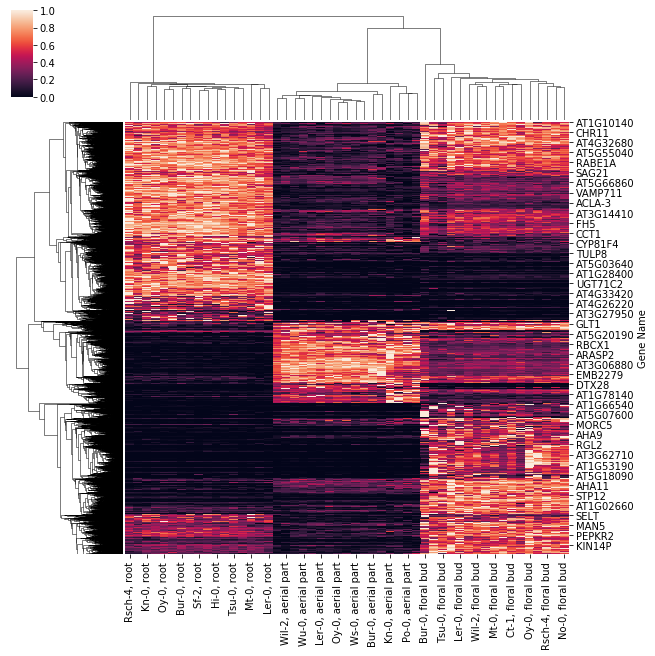

In [17]:
sb.clustermap(df_17_cut.loc[selected_features_17],standard_scale=0)
# Arabidopsis의 종류(맨 아래에 나타남)에 관계없이 유전자의 global pattern은 같음. 따라서 조직 특이성을 기준으로 실험에 참고 가능